In [ ]:
import os
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = "/Users/rajeshr/Desktop/A4/cv/"
classes = ['ba', "ka", 'kaa', 'sa', "tA"]
data_split = ['Test', 'Train']

In [ ]:
Y_train = []
X_train = []
X_test = []
Y_test = []
X_validation = []
Y_validation = []


dir_list = os.listdir(file_path)
print(dir_list)
for j in data_split:
    for i in classes:
        for filename in glob.glob(os.path.join(file_path + '/' + i + '/' + j, '*.mfcc')):
            with open(filename, 'r') as f:

                if (j == "Train"):
                    print(filename)
                    f = open(filename)
                    parsed = f.read().replace(" ", ",").split("\n")
                    final = []
                    for k in parsed:
                        final.append(k.split(","))
                        final[-1] = final[-1][:-1]
                    final = final[:-1]
                    #count = 0
                    for k in final:
                        X_train.append(list(map(float, k)))
                        Y_train.append(str(i))
                if (j == 'Test'):
                    print(filename)
                    f = open(filename)
                    parsed = f.read().replace(" ", ",").split("\n")
                    final = []
                    for k in parsed:
                        final.append(k.split(","))
                        final[-1] = final[-1][:-1]
                    final = final[:-1]
                    for k in final:
                        X_test.append(list(map(float, k)))
                        Y_test.append(str(i))

In [ ]:
print(type(X_test))
X_test = np.asarray(X_test)
X_train = np.asarray(X_train)
#X_validation = np.asarray(X_validation)
X_train=np.expand_dims(np.array(X_train), axis=2)
#X_validation=np.expand_dims(np.array(X_validation), axis=2)
X_train = np.stack(X_train, axis=0)
# X_validation = np.stack(X_validation, axis=0)
X_test=np.expand_dims(np.array(X_test),axis=2)

<class 'list'>


In [ ]:
print(X_train.shape)
#print(X_validation.shape)
print(X_test.shape)

(51505, 39, 1)
(12968, 39, 1)


In [ ]:
X_train[0]

In [ ]:
len(Y_train)
i=Y_train[0]
print(i)

ba


In [ ]:
Y_train

In [1]:
def labels(data):
    res = []
    for i in data:
        if i == "ba":
            res.append(0)
        if i=="ka":
            res.append(1)
        if i=='kaa':
            res.append(2)
        if i=='sa':
            res.append(3)
        if i=='tA':
            res.append(4)
    return res

In [ ]:
ytrain

In [ ]:
ytrain=[]
for i in Y_train:
    if i == "ba":
        ytrain.append(0)
    if i=="ka":
        ytrain.append(1)
    if i=='kaa':
        ytrain.append(2)
    if i=='sa':
        ytrain.append(3)
    if i=='tA':
        ytrain.append(4)

In [ ]:
yval=[]
for i in Y_validation:
    if i == "ba":
        yval.append(0)
    if i=="ka":
        yval.append(1)
    if i=='kaa':
        yval.append(2)
    if i=='sa':
        yval.append(3)
    if i=='tA':
        yval.append(4)

In [ ]:
ytest=[]
for i in Y_test:
  if i == "ba":
    ytest.append(0)
  if i=="ka":
    ytest.append(1)
  if i=='kaa':
    ytest.append(2)
  if i=='sa':
    ytest.append(3)
  if i=='tA':
    ytest.append(4)

In [ ]:
y_train=np.array(ytrain)
#y_val=np.array(yval)
y_test=np.array(ytest)

In [ ]:
y_test[0:]

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
from tensorflow.keras.utils import  to_categorical
y_train1=to_categorical(y_train)
#y_val1=to_categorical(y_val)
y_test1=to_categorical(y_test)

In [ ]:
y_test1[0,:]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# # binary encode
# Y_train = onehotencoding(Y_train)
# Y_test = onehotencoding(Y_test)
# Y_validation = onehotencoding(Y_validation)
# # Y_train=np.expand_dims(np.array(Y_train), axis=0)
# # Y_validation=np.expand_dims(np.array(Y_validation), axis=0)
# Y_train=np.stack(Y_train, axis=0)
# Y_validation=np.stack(Y_validation, axis=0)

# print(X_train.shape, Y_train.shape)

(47637, 39, 1) (47637, 5)


LSTM model

In [ ]:
model1=Sequential()
model1.add(LSTM(128, input_shape =(X_train.shape[1:]),return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(64,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(5,activation='softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 39, 128)           66560     
                                                                 
 dropout_2 (Dropout)         (None, 39, 128)           0         
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 118,213
Trainable params: 118,213
Non-tr

In [ ]:
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",
    min_delta=0.0001,
    patience=3)

In [110]:
history = model1.fit(X_train, y_train1,batch_size=1000,callbacks=[callback] ,epochs=150,verbose=2)

Epoch 1/500
52/52 - 147s - loss: 1.5619 - accuracy: 0.2904 - 147s/epoch - 3s/step
Epoch 2/500
52/52 - 148s - loss: 1.5232 - accuracy: 0.3126 - 148s/epoch - 3s/step
Epoch 3/500
52/52 - 153s - loss: 1.4596 - accuracy: 0.3489 - 153s/epoch - 3s/step
Epoch 4/500
52/52 - 149s - loss: 1.4258 - accuracy: 0.3671 - 149s/epoch - 3s/step
Epoch 5/500
52/52 - 147s - loss: 1.4169 - accuracy: 0.3702 - 147s/epoch - 3s/step
Epoch 6/500
52/52 - 150s - loss: 1.4022 - accuracy: 0.3738 - 150s/epoch - 3s/step
Epoch 7/500
52/52 - 150s - loss: 1.3873 - accuracy: 0.3774 - 150s/epoch - 3s/step
Epoch 8/500
52/52 - 150s - loss: 1.3697 - accuracy: 0.3862 - 150s/epoch - 3s/step
Epoch 9/500
52/52 - 147s - loss: 1.3556 - accuracy: 0.3928 - 147s/epoch - 3s/step
Epoch 10/500
52/52 - 147s - loss: 1.3386 - accuracy: 0.4003 - 147s/epoch - 3s/step
Epoch 11/500
52/52 - 145s - loss: 1.3260 - accuracy: 0.4066 - 145s/epoch - 3s/step
Epoch 12/500
52/52 - 145s - loss: 1.3124 - accuracy: 0.4174 - 145s/epoch - 3s/step
Epoch 13/500


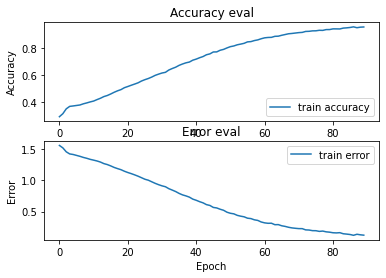

In [111]:
plot_history(history)

In [112]:
model1.evaluate(X_test,y_test1)

406/406 [==============================] - 29s 69ms/step - loss: 4.0613 - accuracy: 0.4587


[4.061348915100098, 0.458744615316391]

In [ ]:
# history=model1.fit(X_train,y_train1,epochs=2,validation_data=(X_validation,y_val1))
# plot_history(history)

In [113]:
predict=model1.predict(X_test)

In [114]:
pred_test=[]
for i in range(len(predict)):
  predict_1=np.argmax(predict[i])
  pred_test.append(predict_1)

true_test=[]
for i in range(len(y_test1)):
  true_1=np.argmax(y_test1[i])
  true_test.append(true_1)


In [115]:
pred1_test=np.array(pred_test)
pred1_test.shape
true1_test=np.array(true_test)
print(true1_test.shape)

(12968,)


In [ ]:
y_test1.shape

(12968, 5)

In [116]:
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(true1_test,pred1_test)
print(cm_test)

[[ 788  195  247  110  222]
 [ 194  727  736  168  292]
 [ 238  662 1939  280  799]
 [ 176  233  298 1215  383]
 [ 277  346  883  280 1280]]


In [ ]:
# def plot_history(history):


#     fig, axs = plt.subplots(2)

#     # create accuracy sublpot
#     axs[0].plot(history.history["accuracy"], label="train accuracy")
#     axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
#     axs[0].set_ylabel("Accuracy")
#     axs[0].legend(loc="lower right")
#     axs[0].set_title("Accuracy eval")

#     # create error sublpot
#     axs[1].plot(history.history["loss"], label="train error")
#     axs[1].plot(history.history["val_loss"], label="validation error")
#     axs[1].set_ylabel("Error")
#     axs[1].set_xlabel("Epoch")
#     axs[1].legend(loc="upper right")
#     axs[1].set_title("Error eval")

#     plt.show()

In [ ]:
def plot_history(history):


    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
   
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Simple RNN model

In [ ]:
from keras.layers.recurrent import SimpleRNN
model2=Sequential()
model2.add(SimpleRNN(128, input_shape =(X_train.shape[1:]),activation='relu',return_sequences=True))
model2.add(Dropout(0.2))
model2.add(SimpleRNN(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(5,activation='softmax'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 39, 128)           16640     
                                                                 
 dropout_1 (Dropout)         (None, 39, 128)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 31,237
Trainable params: 31,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",
    min_delta=0.0001,
    patience=3)

In [ ]:
history = model2.fit(X_train, y_train1, batch_size=1000,callbacks=[callback] ,epochs=10,verbose=2)


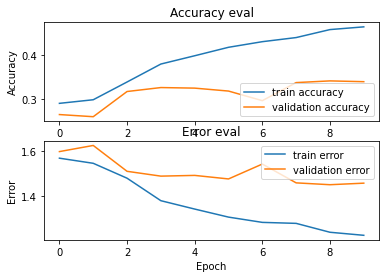

In [ ]:
plot_history(history)

In [ ]:
predict=model2.predict(X_test)

In [ ]:
pred_test=[]
for i in range(len(predict)):
  predict_1=np.argmax(predict[i])
  pred_test.append(predict_1)

true_test=[]
for i in range(len(y_test1)):
  true_1=np.argmax(y_test1[i])
  true_test.append(true_1)


In [ ]:
pred1_test=np.array(pred_test)
pred1_test.shape
true1_test=np.array(true_test)
print(true1_test.shape)

(12968,)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(true1_test,pred1_test)
print(cm_test)

[[ 576   92  422  194  278]
 [ 134  356 1144  149  334]
 [ 168  478 2407  237  628]
 [ 150   75  520 1172  388]
 [ 157  121 1434  343 1011]]
